###Regresión Iterativa con Regularización

In [1]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
import csv
import pandas as pd
import numpy as np
import random as rnd
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [2]:
data = pd.read_csv("extraversion.csv")
print(data.head())
print(data.describe())

           X           X2        X3        X4            y
0   7.317938    53.552216  1.683319  0.859736    20.716319
1   1.284357     1.649574  3.395139  0.959256     8.098008
2  97.740652  9553.235088  0.366480 -0.344100  5992.603427
3  17.753591   315.190006 -1.945300 -0.889370   199.959361
4  66.441081  4414.417290  0.504995 -0.450777  2384.624168
                 X           X2           X3           X4            y
count  1029.000000  1029.000000  1029.000000  1029.000000  1029.000000
mean     48.052380  3113.669342    -2.038734    -0.011250  1930.580335
std      28.379936  2891.956247    42.569126     0.717016  1780.286709
min       0.006314     0.000040 -1302.068992    -0.999993     0.413908
25%      23.174764   537.069691    -1.112964    -0.731530   362.961744
50%      47.655827  2271.077831    -0.026429    -0.046938  1419.544225
75%      71.372550  5094.040863     0.987838     0.732296  3131.147903
max      99.873062  9974.628610    81.923095     1.000000  7018.336053


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(data[['X','X2','X3','X4']],data[['y']], train_size=.75)
print len(X_train), len(X_test)

771 258


#### 2) Transformación de los datos

In [4]:
X_scaler = pp.StandardScaler().fit(X_train)
X_scaled = pd.DataFrame(X_scaler.transform(X_train))
print X_scaled.head()

          0         1         2         3
0  0.362566  0.095760  0.655465  1.431288
1  0.524693  0.287442  0.040532 -0.119432
2 -0.401830 -0.609896 -0.142551 -1.347614
3 -1.259386 -1.012523  0.019938 -0.994448
4 -1.047648 -0.951357  0.005198 -1.182286


In [5]:
Y_scaler = pp.StandardScaler().fit(Y_train)
Y_scaled = pd.DataFrame(Y_scaler.transform(Y_train))
print Y_scaled.head()

          0
0  0.143872
1  0.347150
2 -0.566762
3 -1.017345
4 -0.985436


#### 3) Se definen las funciones entrena (con regularicación lambda) y el actualizador de las w's

In [6]:
def actualizador (w0, W, x_i):
    weight = w0
    for i in range(len(W)):
        weight = weight + (W[i] * x_i[i])
    return weight

In [7]:
def entrena(w0, W, X, Y, eta, lam):
    for i in range(len(X)):
        x_i = X.iloc[i]
        y_hat = actualizador(w0, W, x_i)
        error = Y.iloc[i] - y_hat
        w0 = w0 + eta * error 
        for j in range(len(x_i)):
            W[j] = W[j] + (eta * error * X.iloc[i][j]) - (lam * W[j])
    return w0, W

####4) Valores iniciales para las iteraciones

In [8]:
w0 = 0
W = [rnd.random(),rnd.random(),rnd.random(),rnd.random()]
eta = 0.001
lam = np.arange(0.00,0.01,0.001)

In [141]:
print (w0,W,eta,lam)

(0, [0.666784864547979, 0.4866099726432135, 0.25863053745943265, 0.3206822662543932], 0.001, array([ 0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,
        0.008,  0.009]))


####5) Iteramos los errores en el recorrido de lambda

In [9]:
errores = []

for i in range(len(lam)):
    new_w = entrena(w0, W, X_scaled, Y_scaled, eta, lam[i])
    Y_hat = new_w[0]+X_scaled[0]*new_w[1][0]+X_scaled[1]*new_w[1][1]+X_scaled[2]*new_w[1][2]+X_scaled[3]*new_w[1][3]
    Y_hat = pd.DataFrame(Y_hat)
    error = np.mean((Y_scaled - Y_hat) ** 2)
    errores.insert(i, error)

####6) Visualización de los errores

('errores', [0    0.062182
dtype: float64, 0    0.014856
dtype: float64, 0    0.118118
dtype: float64, 0    0.21578
dtype: float64, 0    0.292752
dtype: float64, 0    0.354134
dtype: float64, 0    0.403967
dtype: float64, 0    0.445091
dtype: float64, 0    0.479521
dtype: float64, 0    0.50871
dtype: float64])


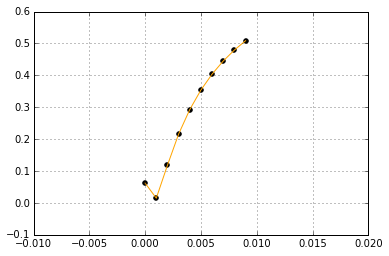

In [148]:
print("errores",errores)
plt.scatter(lam, errores, color = 'black')
plt.plot(lam, errores, color = 'orange')
plt.grid()
plt.show()

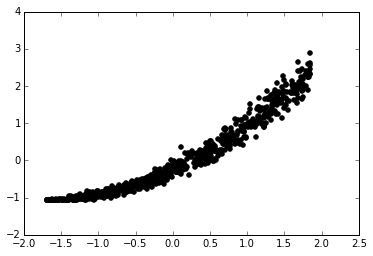

In [149]:
plt.scatter(X_scaled[0], Y_scaled[0], color='black')